# Convolutional Neural Network

2019.01.12

![](https://i.stack.imgur.com/ZgG1Z.png)

### まとめ
- CNNのアーキテクチャーは3Dだが、画像データ自体は（サンプル枚数、行、列、チャネル）の4Dにリシェイプする
- SimpleNNではアーキテクチャが1D（行列）、画像データ自体は（サンプル枚数、行列）の2Dにリシェイプした
- ModelsのNNアーキテクチャの選択（Conv1D, Conv2D）によってリシェイプする

## Process
1. Preprocess Data
2. Reshape and Scaling Features Data
3. Reshape and Encode Target Data
4. Build and Compile A Model
5. Fit Training and Validation Data to Model
6. Evaluate Model

## 1-3. Preprocess Data

In [5]:
from keras.datasets import mnist
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print("train_images", train_images.shape)
print("train_labels", train_labels.shape)

train_images (60000, 28, 28)
train_labels (60000,)


In [8]:
print("test_images", test_images.shape)
print("test_labels", test_labels.shape)

test_images (10000, 28, 28)
test_labels (10000,)


In [11]:
train_images.max()

255

In [12]:
train_images.min()

0

We add chanel to Features Data  
- 特徴データは、（サンプル数、行ピクセル、列ピクセル、カラーチャネル）の４次元テンソルにする
- ターゲットデータは、（サンプル数、クラス数）の２次元テンソルにする

In [9]:
train_images = train_images.reshape(((60000, 28, 28, 1)))
test_images = test_images.reshape((10000, 28, 28, 1))

In [13]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


Now we got 4D Features and 2D Target Data

### 注意：モデルのアーキテクチャでは、サンプル数やミニバッチ数は考慮されない

- 3Dでインプットされた画像は、畳み込み層とプーリング層まで3Dで処理される
- アウトプットは、10クラスの1DベクトルなのでFlattenする必要がある

## 4. Build a CNN Model

- Input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
- Inputs of size `(28, 28, 1)`, which is the format of `input_shape=(28, 28, 1)` to our first layer.

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # pixel, pixel, channel
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### 分類問題はベクトル 
- The output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`.
- The width and height dimensions tend to shrink as we go deeper in the network.
- The number of channels is controlled by the first argument passed to the `Conv2D` layers (e.g. 32 or 64).

- The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected
- These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
- So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [24]:
from keras.layers import Flatten, Dense
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [30]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 5. Fit Training and Validation Data to Model

In [31]:
histry = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1721 - acc: 0.9459
Epoch 2/5
60000/60000 [==============================] - 52s 868us/step - loss: 0.0497 - acc: 0.9843
Epoch 3/5
60000/60000 [==============================] - 52s 871us/step - loss: 0.0345 - acc: 0.9893
Epoch 4/5
60000/60000 [==============================] - 52s 868us/step - loss: 0.0253 - acc: 0.9919
Epoch 5/5
60000/60000 [==============================] - 52s 872us/step - loss: 0.0203 - acc: 0.9938


In [36]:
histry

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

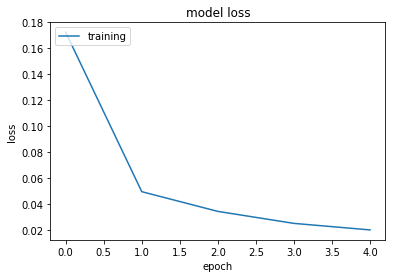

In [35]:
# summarize history for loss
plt.plot(histry.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

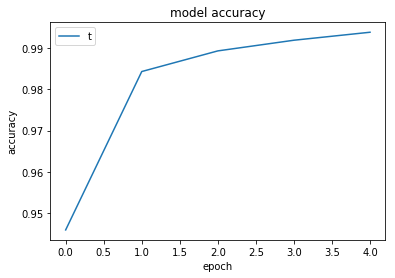

In [34]:
# summarize history for accuracy
# metrics=['accuracy']
plt.plot(histry.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('training', loc='upper left')
plt.show()

## Advanced: Hyperparameter Tuning

In [40]:
MINI_BATCH_SIZE = [32, 64, 128]
NUM_EPOCHS = [5, 10, 15]

for b in range(len(MINI_BATCH_SIZE)):
    batch_size = MINI_BATCH_SIZE[b]
    for e in range(len(NUM_EPOCHS)):
        epochs = NUM_EPOCHS[e]
        print("epochs is %s"%epochs, "batch_size is %s"%batch_size)
        history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

epochs is 5 batch_size is 32
Epoch 1/5
60000/60000 [==============================] - 57s 950us/step - loss: 0.0155 - acc: 0.9953
Epoch 2/5
60000/60000 [==============================] - 60s 993us/step - loss: 0.0136 - acc: 0.9963
Epoch 3/5
60000/60000 [==============================] - 59s 990us/step - loss: 0.0120 - acc: 0.9968
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0111 - acc: 0.9972
Epoch 5/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0098 - acc: 0.9974
epochs is 10 batch_size is 32
Epoch 1/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0087 - acc: 0.9981
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0078 - acc: 0.9980
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0083 - acc: 0.9981
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0085 - acc: 0.9982
Epoch 5/10
60000/60000 [================

## 6. Evaluate Model

In [41]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 560us/step


[0.08627175804690473, 0.9934]

In [42]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 533us/step


In [43]:
test_loss

0.08627175804690473

In [44]:
test_accuracy

0.9934